# TwinsUK biological age model fit

Inputs: intermediate preprocessed TwinsUK data file, TwinsUK_pre_BA_fit.csv   
Outputs: data file with metabolomic biological ages of TwinsUK individuals, TwinsUK_BA_fits.csv

'Save' lines are commented out
Note: some degree of randomization in fitting

In [8]:
#import packages
import pandas as pd
from IPython.display import display
# get the library
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math
def mean_impute(dataframe, axis=0):
    """Fills NaN with the axis mean.
    Args:
        df (pandas.DataFrame): a vectorized dataframe
        axis (Optional[int]): by rows(1) or columns(0), Default=1
    Returns:
        pandas.DataFrame: a copy of the provided dataframe with the
            null values filled with axis mean.
    """

    return dataframe.apply(lambda x: x.fillna(x.mean()), axis=axis)

# prep metab df

In [57]:
met_df = pd.read_csv('/notebooks/0. APOE-Multiomics/Data_Files/TwinsUK_pre_BA_fit.csv')

In [58]:
# call df

In [59]:
# def analytes lists, to align with Arivale list

In [60]:
col_list=['KeyIndex','Age','Sex','Fasting_Status','carnitine',
 '3-phenylpropionate (hydrocinnamate)',
 'hippurate',
 '3-methyl-2-oxovalerate',
 'methionine sulfoxide',
 '3-methylhistidine',
 '5-hydroxylysine',
 '4-guanidinobutanoate',
 'glucuronate',
 'imidazole lactate',
 'kynurenine',
 'glycerophosphorylcholine (GPC)',
 'N-acetylglutamate',
 'ribitol',
 'glycodeoxycholate',
 'theophylline',
 'quinate',
 'theobromine',
 #'gentisate',
 'paraxanthine',
 'indolelactate',
 '3-indoxyl sulfate',
 'gamma-glutamylphenylalanine',
 '4-methyl-2-oxopentanoate',
 '1,5-anhydroglucitol (1,5-AG)',
 '1-palmityl-GPC (O-16:0)',
 '1-stearoyl-2-arachidonoyl-GPI (18:0/20:4)',
 'sphingosine 1-phosphate',
 '1-stearoyl-GPI (18:0)',
 '1,2-dipalmitoyl-GPC (16:0/16:0)',
 'docosahexaenoate (DHA; 22:6n3)',
 '1-myristoyl-2-palmitoyl-GPC (14:0/16:0)',
 'alpha-hydroxyisocaproate',
 'maleate',
 '2-hydroxyoctanoate',
 '3-hydroxyoctanoate',
 'phenyllactate (PLA)',
 'palmitoylcarnitine (C16)',
 'hexanoylcarnitine (C6)',
 'N-acetylaspartate (NAA)',
 'dehydroepiandrosterone sulfate (DHEA-S)',
 'acetylcarnitine (C2)',
 'cysteine s-sulfate',
 '1-palmitoylglycerol (16:0)',
 'tartronate (hydroxymalonate)',
 'oxalate (ethanedioate)',
 'erythritol',
 '1-oleoylglycerol (18:1)',
 '3-methyl-2-oxobutyrate',
 'homoarginine',
 'homocitrulline',
 '3-hydroxydecanoate',
 'N-acetylglycine',
 'ribonate',
 'threonate',
 'indoleacetate',
 '1-linoleoylglycerol (18:2)',
 '1-methylhistidine',
 'butyrylcarnitine (C4)',
 'isobutyrylcarnitine (C4)',
 'androsterone sulfate',
 'indolepropionate',
 "trigonelline (N'-methylnicotinate)",
 'dodecanedioate (C12-DC)',
 'N-acetyltyrosine',
 '1,3-dimethylurate',
 '3-methylxanthine',
 '3-hydroxylaurate',
 'pyridoxate',
 'gamma-glutamylvaline',
 'propionylglycine',
 'propionylcarnitine (C3)',
 'pro-hydroxy-pro',
 '3-hydroxy-2-ethylpropionate',
 '3-carboxy-4-methyl-5-propyl-2-furanpropanoate (CMPF)',
 'docosapentaenoate (n3 DPA; 22:5n3)',
 'docosadienoate (22:2n6)',
 'adrenate (22:4n6)',
 '10-undecenoate (11:1n1)',
 'myristoleate (14:1n5)',
 '1-methyl-4-imidazoleacetate',
 'sebacate (C10-DC)',
 'stearidonate (18:4n3)',
 '5-dodecenoate (12:1n7)',
 'octanoylcarnitine (C8)',
 'decanoylcarnitine (C10)',
 'N-acetylglutamine',
 'N-acetyltryptophan',
 'N-acetylphenylalanine',
 #'gamma-glutamyl-epsilon-lysine',
 '1-palmitoyl-GPC (16:0)',
 '1-margaroyl-GPC (17:0)',
 'piperine',
 'myristoylcarnitine (C14)',
 '1-stearoyl-GPC (18:0)',
 '1-oleoyl-GPC (18:1)',
 #'N-acetylisoleucine',
 '10-nonadecenoate (19:1n9)',
 '10-heptadecenoate (17:1n7)',
 'epiandrosterone sulfate',
 'N-acetylhistidine',
 'gamma-glutamylglycine',
 'stachydrine',
 'alpha-hydroxyisovalerate',
 'gamma-glutamylmethionine',
 'gamma-glutamylthreonine',
 'p-cresol sulfate',
 'erythronate*',
 'eicosenoate (20:1)',
 'linolenate [alpha or gamma; (18:3n3 or 6)]',
 '1-myristoyl-GPC (14:0)',
 '1-arachidoyl-GPC (20:0)',
 'stearoylcarnitine (C18)',
 'laurylcarnitine (C12)',
 'isovalerylcarnitine (C5)',
 '1-linoleoyl-GPC (18:2)',
 '7-methylxanthine',
 '1,7-dimethylurate',
 '5-acetylamino-6-formylamino-3-methyluracil',
 '5-acetylamino-6-amino-3-methyluracil',
 '1-methylxanthine',
 'N2,N2-dimethylguanosine',
 'N6-carbamoylthreonyladenosine',
 'orotidine',
 'phenylacetylglutamine',
 '4-hydroxyhippurate',
 '1-arachidonylglycerol (20:4)',
 '5-methyluridine (ribothymidine)',
 'isovalerylglycine',
 '7-methylguanine',
 '1-stearoyl-GPE (18:0)',
 'N1-Methyl-2-pyridone-5-carboxamide',
 'gamma-glutamylisoleucine*',
 'oleoylcarnitine (C18:1)',
 '2-methylbutyrylcarnitine (C5)',
 'phenol sulfate',
 '1-palmitoleoyl-GPC (16:1)*',
 'pyroglutamine*',
 '2-hydroxy-3-methylvalerate',
 '1-arachidonoyl-GPC (20:4n6)*',
 '1-dihomo-linolenoyl-GPC (20:3n3 or 6)*',
 '1-dihomo-linoleoyl-GPC (20:2)*',
 '2-arachidonoyl-GPC (20:4)*',
 '2-oleoyl-GPC (18:1)*',
 '2-linoleoyl-GPC (18:2)*',
 '2-palmitoyl-GPC (16:0)*',
 '1-docosahexaenoyl-GPC (22:6)*',
 '1-palmitoyl-GPE (16:0)',
 '1-oleoyl-GPE (18:1)',
 '1-linoleoyl-GPE (18:2)*',
 '1-arachidonoyl-GPE (20:4n6)*',
 'N-acetylcitrulline',
 '2-hydroxypalmitate',
 'isobutyrylglycine',
 'glutarylcarnitine (C5-DC)',
 'tiglylcarnitine (C5:1-DC)',
 'hydroquinone sulfate',
 'catechol sulfate',
 '7-alpha-hydroxy-3-oxo-4-cholestenoate (7-Hoca)',
 'tetradecanedioate (C14-DC)',
 'hexadecanedioate (C16-DC)',
 'glycerophosphoethanolamine',
 '2-oleoyl-GPE (18:1)*',
 '2-palmitoyl-GPE (16:0)*',
 '1-arachidonoyl-GPI (20:4)*',
 '1-palmitoyl-GPI (16:0)',
 'glycolithocholate sulfate*',
 'taurolithocholate 3-sulfate',
 'deoxycarnitine',
 '2-arachidonoyl-GPE (20:4)*',
 'N6-acetyllysine',
 'dihomo-linolenate (20:3n3 or n6)',
 'mannitol/sorbitol',
 'tryptophan betaine',
 '4-vinylphenol sulfate',
 '4-ethylphenylsulfate',
 'thymol sulfate',
 '2-linoleoyl-GPE (18:2)*',
 '1-oleoyl-GPI (18:1)',
 '1-linoleoyl-GPI (18:2)*',
 'dimethylarginine (SDMA + ADMA)',
 'N-acetylserine',
 '1-stearoyl-2-oleoyl-GPE (18:0/18:1)',
 '4-allylphenol sulfate',
 '1-stearoyl-2-arachidonoyl-GPC (18:0/20:4)',
 '1-palmitoyl-2-linoleoyl-GPE (16:0/18:2)',
 'sphinganine-1-phosphate',
 'succinylcarnitine (C4-DC)',
 'bilirubin (E,E)*',
 'bilirubin (E,Z or Z,E)*',
 'N-methylproline',
 '5alpha-androstan-3beta,17beta-diol disulfate',
 '5alpha-pregnan-3beta,20alpha-diol disulfate',
 'glycocholenate sulfate*',
 'taurocholenate sulfate*',
 'androstenediol (3beta,17beta) disulfate (1)',
 'pregnenediol disulfate (C21H34O8S2)*',
 'androstenediol (3beta,17beta) disulfate (2)',
 '21-hydroxypregnenolone disulfate',
 '5alpha-pregnan-3beta,20beta-diol monosulfate (1)',
 '5alpha-pregnan-3beta,20alpha-diol monosulfate (2)',
 '5alpha-androstan-3alpha,17beta-diol monosulfate (1)',
 '5alpha-androstan-3beta,17alpha-diol disulfate',
 'androstenediol (3alpha, 17alpha) monosulfate (2)',
 'androstenediol (3alpha, 17alpha) monosulfate (3)',
 'androstenediol (3beta,17beta) monosulfate (1)',
 'androstenediol (3beta,17beta) monosulfate (2)',
 '1-docosahexaenoyl-GPE (22:6)*',
 '1-docosapentaenoyl-GPC (22:5n3)*',
 'pregnenediol sulfate (C21H34O5S)*',
 '2-hydroxyglutarate',
 'gamma-CEHC',
 'N-acetyl-beta-alanine',
 'sphingomyelin (d18:1/18:1, d18:2/18:0)',
 'palmitoyl sphingomyelin (d18:1/16:0)',
 '3-hydroxyhippurate',
 '16a-hydroxy DHEA 3-sulfate',
 'pregnenolone sulfate',
 'andro steroid monosulfate C19H28O6S (1)*',
 'ergothioneine',
 '1-margaroyl-GPE (17:0)*',
 '1-pentadecanoyl-GPC (15:0)*',
 '13-HODE + 9-HODE',
 'cinnamoylglycine',
 'cis-4-decenoylcarnitine (C10:1)',
 '(16 or 17)-methylstearate (a19:0 or i19:0)',
 '2,3-dihydroxyisovalerate',
 '3-methylglutaconate',
 'hydantoin-5-propionate',
 'sulfate*',
 'S-methylcysteine',
 '1-adrenoyl-GPC (22:4)*',
 '1-(1-enyl-palmitoyl)-GPC (P-16:0)*',
 '1-(1-enyl-oleoyl)-GPC (P-18:1)*',
 'glycoursodeoxycholate',
 '16-hydroxypalmitate',
 'oleoyl-linoleoyl-glycerol (18:1/18:2) [1]',
 'oleoyl-linoleoyl-glycerol (18:1/18:2) [2]',
 '1-(1-enyl-palmitoyl)-GPE (P-16:0)*',
 '1-(1-enyl-stearoyl)-GPE (P-18:0)*',
 'linoleoylcarnitine (C18:2)*',
 'trimethylamine N-oxide',
 'imidazole propionate',
 'pregnanediol-3-glucuronide',
 'phenylalanyltryptophan',
 'N-palmitoylglycine',
 'succinimide',
 '2-stearoyl-GPE (18:0)*',
 '(R)-3-hydroxybutyrylcarnitine',
 'N-acetylcarnosine',
 '2-hydroxydecanoate',
 '4-methylcatechol sulfate',
 '3-methyl catechol sulfate (1)',
 'guaiacol sulfate',
 '2-aminooctanoate',
 '2-piperidinone',
 'N-acetyl-1-methylhistidine*',
 '2-aminophenol sulfate',
 'sphingomyelin (d18:1/14:0, d16:1/16:0)*',
 'sphingomyelin (d18:2/16:0, d18:1/16:1)*',
 '6-oxopiperidine-2-carboxylate',
 'S-allylcysteine',
 'N-delta-acetylornithine',
 '2-aminoheptanoate',
 '1-eicosapentaenoyl-GPE (20:5)*',
 'methionine sulfone',
 '1-linolenoyl-GPC (18:3)*',
 '1-eicosapentaenoyl-GPC (20:5)*',
 '1-eicosenoyl-GPC (20:1)*',
 'N-acetylalliin',
 '1-dihomo-linolenoyl-GPE (20:3n3 or 6)*',
 '1-(1-enyl-oleoyl)-GPE (P-18:1)*',
 'O-sulfo-L-tyrosine',
 'etiocholanolone glucuronide',
 'N-acetyltaurine',
 '1-docosapentaenoyl-GPC (22:5n6)*',
 '3-methylglutarylcarnitine (2)',
 'methyl glucopyranoside (alpha + beta)',
 'sphingomyelin (d18:2/14:0, d18:1/14:1)*',
 'sphingomyelin (d18:1/24:1, d18:2/24:0)*',
 'myristoleoylcarnitine (C14:1)*',
 'N-formylphenylalanine',
 '4-hydroxychlorothalonil',
 'tyramine O-sulfate',
 '3-hydroxypyridine sulfate',
 'arabonate/xylonate',
 'methyl-4-hydroxybenzoate sulfate',
 'p-cresol glucuronide*',
 'sphingomyelin (d18:1/20:0, d16:1/22:0)*',
 'sphingomyelin (d18:1/20:1, d18:2/20:0)*',
 'behenoyl sphingomyelin (d18:1/22:0)*',
 'sphingomyelin (d17:1/16:0, d18:1/15:0, d16:1/17:0)*',
 'dopamine 3-O-sulfate',
 'C-glycosyltryptophan',
 'arabitol/xylitol',
 '1,2-dilinoleoyl-GPC (18:2/18:2)',
 '1-stearoyl-2-oleoyl-GPC (18:0/18:1)',
 '1-palmitoyl-2-arachidonoyl-GPC (16:0/20:4n6)',
 '1-palmitoyl-2-docosahexaenoyl-GPC (16:0/22:6)',
 '1-stearoyl-2-docosahexaenoyl-GPC (18:0/22:6)',
 '1-(1-enyl-stearoyl)-2-oleoyl-GPC (P-18:0/18:1)',
 '1-(1-enyl-stearoyl)-2-arachidonoyl-GPC (P-18:0/20:4)',
 '1-(1-enyl-stearoyl)-2-oleoyl-GPE (P-18:0/18:1)',
 'sphingomyelin (d18:1/17:0, d17:1/18:0, d19:1/16:0)',
 '1-palmitoyl-2-stearoyl-GPC (16:0/18:0)',
 '2-hydroxybutyrate/2-hydroxyisobutyrate',
 'oleate/vaccenate (18:1)',
 #'leucylphenylalanine/isoleucylphenylalanine',
 'palmitoyl dihydrosphingomyelin (d18:0/16:0)*',
 'tricosanoyl sphingomyelin (d18:1/23:0)*',
 'sphingomyelin (d18:2/23:0, d18:1/23:1, d17:1/24:1)*',
 'sphingomyelin (d18:2/24:1, d18:1/24:2)*',
 '1-stearoyl-2-linoleoyl-GPE (18:0/18:2)*',
 '1-stearoyl-2-arachidonoyl-GPE (18:0/20:4)',
 '1-stearoyl-2-linoleoyl-GPC (18:0/18:2)*',
 '1-palmitoyl-2-palmitoleoyl-GPC (16:0/16:1)*',
 '1-palmitoyl-2-eicosapentaenoyl-GPC (16:0/20:5)*',
 '1-palmitoyl-2-arachidonoyl-GPE (16:0/20:4)*',
 '1-palmitoyl-2-docosahexaenoyl-GPE (16:0/22:6)*',
 '1-stearoyl-2-docosahexaenoyl-GPE (18:0/22:6)*',
 '1-palmitoyl-2-arachidonoyl-GPI (16:0/20:4)*',
 '1-stearoyl-2-linoleoyl-GPI (18:0/18:2)',
 'gamma-tocopherol/beta-tocopherol',
 '1-(1-enyl-stearoyl)-2-arachidonoyl-GPE (P-18:0/20:4)*',
 '1-(1-enyl-palmitoyl)-2-docosahexaenoyl-GPE (P-16:0/22:6)*',
 '1-(1-enyl-palmitoyl)-2-arachidonoyl-GPE (P-16:0/20:4)*',
 '1-(1-enyl-stearoyl)-2-docosahexaenoyl-GPE (P-18:0/22:6)*',
 '1-(1-enyl-palmitoyl)-2-oleoyl-GPE (P-16:0/18:1)*',
 '1-(1-enyl-palmitoyl)-2-oleoyl-GPC (P-16:0/18:1)*',
 '1-(1-enyl-palmitoyl)-2-docosahexaenoyl-GPC (P-16:0/22:6)*',
 '1-(1-enyl-palmitoyl)-2-linoleoyl-GPC (P-16:0/18:2)*',
 '1-(1-enyl-palmitoyl)-2-arachidonoyl-GPC (P-16:0/20:4)*',
 '1-(1-enyl-stearoyl)-2-docosahexaenoyl-GPC (P-18:0/22:6)*',
 'sphingomyelin (d18:1/21:0, d17:1/22:0, d16:1/23:0)*',
 '1-pentadecanoyl-2-linoleoyl-GPC (15:0/18:2)*',
 '1-margaroyl-2-oleoyl-GPC (17:0/18:1)*',
 '1-margaroyl-2-linoleoyl-GPC (17:0/18:2)*',
 '1-stearoyl-2-dihomo-linolenoyl-GPC (18:0/20:3n3 or 6)*',
 'palmitoyl-linoleoyl-glycerol (16:0/18:2) [1]*',
 'palmitoyl-linoleoyl-glycerol (16:0/18:2) [2]*',
 '1-palmitoyl-2-oleoyl-GPI (16:0/18:1)*',
 '1-(1-enyl-palmitoyl)-2-linoleoyl-GPE (P-16:0/18:2)*',
 '1-oleoyl-2-docosahexaenoyl-GPC (18:1/22:6)*',
 '1-myristoyl-2-linoleoyl-GPC (14:0/18:2)*',
 '1-stearoyl-2-docosapentaenoyl-GPC (18:0/22:5n3)*',
 '1-stearoyl-2-docosapentaenoyl-GPC (18:0/22:5n6)*',
 '1-palmitoyl-2-adrenoyl-GPC (16:0/22:4)*',
 '1-oleoyl-2-dihomo-linolenoyl-GPC (18:1/20:3)*',
 '1-(1-enyl-palmitoyl)-2-palmitoyl-GPC (P-16:0/16:0)*',
 'phosphatidylcholine (16:0/22:5n3, 18:1/20:4)*',
 'trans-4-hydroxyproline',
 'allantoin',
 'xanthine',
 '5-oxoproline',
 'pantothenate',
 'pipecolate',
 'glycerate',
 'N-acetylleucine',
 'N-acetylmethionine',
 'N-acetylvaline',
 'erucate (22:1n9)',
 'bilirubin (Z,Z)',
 'thyroxine',
 'gamma-glutamyltyrosine',
 'alpha-tocopherol',
 '3-hydroxyisobutyrate',
 'N-acetylalanine',
 'vanillylmandelate (VMA)',
 '4-acetamidobutanoate',
 '3-aminoisobutyrate',
 '3-hydroxy-3-methylglutarate',
 'citrate',
 '2-aminobutyrate',
 'urate',
 'ursodeoxycholate',
 'oleoyl ethanolamide',
 'gamma-glutamylglutamine',
 '4-hydroxyphenylpyruvate',
 'N-acetylneuraminate',
 'creatine',
 'cys-gly, oxidized',
 'dihomo-linoleate (20:2n6)',
 'gamma-glutamylhistidine',
 '2-hydroxystearate',
 'N1-methyladenosine',
 'glycerol',
 'choline',
 'gamma-glutamylleucine',
 '3-methoxytyrosine',
 'cholate',
 'beta-hydroxyisovalerate',
 'palmitoyl ethanolamide',
 'N-palmitoyl-sphingosine (d18:1/16:0)',
 '1-palmitoyl-2-oleoyl-GPE (16:0/18:1)',
 '1-palmitoyl-2-linoleoyl-GPI (16:0/18:2)',
 '1-palmitoyl-2-linoleoyl-GPC (16:0/18:2)',
 'stearoyl sphingomyelin (d18:1/18:0)',
 '1-palmitoyl-2-oleoyl-GPC (16:0/18:1)',
 '5,6-dihydrothymine',
 'glycochenodeoxycholate',
 'taurochenodeoxycholate',
 'taurocholate',
 'taurodeoxycholate',
 'hypoxanthine',
 'linoleate (18:2n6)',
 'laurate (12:0)',
 'quinolinate',
 '2-hydroxyhippurate (salicylurate)',
 'N6,N6,N6-trimethyllysine',
 'N-acetylputrescine',
 'N-formylmethionine',
 'eicosapentaenoate (EPA; 20:5n3)',
 'methylsuccinate',
 'ethylmalonate',
 '5-methylthioadenosine (MTA)',
 'arachidonate (20:4n6)',
 'arginine',
 'aspartate',
 '3-(4-hydroxyphenyl)lactate',
 'phenylpyruvate',
 'beta-alanine',
 'biliverdin',
 'succinate',
 '3-hydroxybutyrate (BHBA)',
 'cholesterol',
 'choline phosphate',
 'cortisone',
 'creatinine',
 'cysteinylglycine',
 'cystine',
 'sphingosine',
 'deoxycholate',
 'sphinganine',
 'fumarate',
 'gamma-glutamylglutamate',
 'gluconate',
 'glutarate (C5-DC)',
 'glycine',
 'glycocholate',
 'guanidinoacetate',
 'histidine',
 'cortisol',
 #'hypotaurine',
 'inosine',
 'myo-inositol',
 'isoleucine',
 'citrulline',
 'leucine',
 'lysine',
 'malate',
 'methionine',
 'palmitate (16:0)',
 'nicotinamide',
 'stearate (18:0)',
 'ornithine',
 'orotate',
 'palmitoleate (16:1n7)',
 'phenylalanine',
 'phosphate',
 'proline',
 'lactate',
 'retinol (Vitamin A)',
 'spermidine',
 'salicylate',
 'serine',
 'serotonin',
 'taurine',
 'myristate (14:0)',
 'urea',
 'uridine',
 'trans-urocanate',
 '1-methylnicotinamide',
 'glutamate',
 'glutamine',
 'threonine',
 'tryptophan',
 'valine',
 'glucose',
 'adenosine',
 'betaine',
 'cysteine',
 'mannose',
 'dimethylglycine',
 'alanine',
 'tyrosine',
 'pseudouridine',
 'pyruvate',
 'uracil',
 'caffeine',
 'fructose',
 'adenine',
 'caprate (10:0)',
 'margarate (17:0)',
 'nonadecanoate (19:0)',
 'arachidate (20:0)',
 'asparagine',
 'alpha-ketoglutarate',
 'caprylate (8:0)',
 'kynurenate']

In [61]:
metab_list=['carnitine',
 '3-phenylpropionate (hydrocinnamate)',
 'hippurate',
 '3-methyl-2-oxovalerate',
 'methionine sulfoxide',
 '3-methylhistidine',
 '5-hydroxylysine',
 '4-guanidinobutanoate',
 'glucuronate',
 'imidazole lactate',
 'kynurenine',
 'glycerophosphorylcholine (GPC)',
 'N-acetylglutamate',
 'ribitol',
 'glycodeoxycholate',
 'theophylline',
 'quinate',
 'theobromine',
 #'gentisate',
 'paraxanthine',
 'indolelactate',
 '3-indoxyl sulfate',
 'gamma-glutamylphenylalanine',
 '4-methyl-2-oxopentanoate',
 '1,5-anhydroglucitol (1,5-AG)',
 '1-palmityl-GPC (O-16:0)',
 '1-stearoyl-2-arachidonoyl-GPI (18:0/20:4)',
 'sphingosine 1-phosphate',
 '1-stearoyl-GPI (18:0)',
 '1,2-dipalmitoyl-GPC (16:0/16:0)',
 'docosahexaenoate (DHA; 22:6n3)',
 '1-myristoyl-2-palmitoyl-GPC (14:0/16:0)',
 'alpha-hydroxyisocaproate',
 'maleate',
 '2-hydroxyoctanoate',
 '3-hydroxyoctanoate',
 'phenyllactate (PLA)',
 'palmitoylcarnitine (C16)',
 'hexanoylcarnitine (C6)',
 'N-acetylaspartate (NAA)',
 'dehydroepiandrosterone sulfate (DHEA-S)',
 'acetylcarnitine (C2)',
 'cysteine s-sulfate',
 '1-palmitoylglycerol (16:0)',
 'tartronate (hydroxymalonate)',
 'oxalate (ethanedioate)',
 'erythritol',
 '1-oleoylglycerol (18:1)',
 '3-methyl-2-oxobutyrate',
 'homoarginine',
 'homocitrulline',
 '3-hydroxydecanoate',
 'N-acetylglycine',
 'ribonate',
 'threonate',
 'indoleacetate',
 '1-linoleoylglycerol (18:2)',
 '1-methylhistidine',
 'butyrylcarnitine (C4)',
 'isobutyrylcarnitine (C4)',
 'androsterone sulfate',
 'indolepropionate',
 "trigonelline (N'-methylnicotinate)",
 'dodecanedioate (C12-DC)',
 'N-acetyltyrosine',
 '1,3-dimethylurate',
 '3-methylxanthine',
 '3-hydroxylaurate',
 'pyridoxate',
 'gamma-glutamylvaline',
 'propionylglycine',
 'propionylcarnitine (C3)',
 'pro-hydroxy-pro',
 '3-hydroxy-2-ethylpropionate',
 '3-carboxy-4-methyl-5-propyl-2-furanpropanoate (CMPF)',
 'docosapentaenoate (n3 DPA; 22:5n3)',
 'docosadienoate (22:2n6)',
 'adrenate (22:4n6)',
 '10-undecenoate (11:1n1)',
 'myristoleate (14:1n5)',
 '1-methyl-4-imidazoleacetate',
 'sebacate (C10-DC)',
 'stearidonate (18:4n3)',
 '5-dodecenoate (12:1n7)',
 'octanoylcarnitine (C8)',
 'decanoylcarnitine (C10)',
 'N-acetylglutamine',
 'N-acetyltryptophan',
 'N-acetylphenylalanine',
 #'gamma-glutamyl-epsilon-lysine',
 '1-palmitoyl-GPC (16:0)',
 '1-margaroyl-GPC (17:0)',
 'piperine',
 'myristoylcarnitine (C14)',
 '1-stearoyl-GPC (18:0)',
 '1-oleoyl-GPC (18:1)',
 #'N-acetylisoleucine',
 '10-nonadecenoate (19:1n9)',
 '10-heptadecenoate (17:1n7)',
 'epiandrosterone sulfate',
 'N-acetylhistidine',
 'gamma-glutamylglycine',
 'stachydrine',
 'alpha-hydroxyisovalerate',
 'gamma-glutamylmethionine',
 'gamma-glutamylthreonine',
 'p-cresol sulfate',
 'erythronate*',
 'eicosenoate (20:1)',
 'linolenate [alpha or gamma; (18:3n3 or 6)]',
 '1-myristoyl-GPC (14:0)',
 '1-arachidoyl-GPC (20:0)',
 'stearoylcarnitine (C18)',
 'laurylcarnitine (C12)',
 'isovalerylcarnitine (C5)',
 '1-linoleoyl-GPC (18:2)',
 '7-methylxanthine',
 '1,7-dimethylurate',
 '5-acetylamino-6-formylamino-3-methyluracil',
 '5-acetylamino-6-amino-3-methyluracil',
 '1-methylxanthine',
 'N2,N2-dimethylguanosine',
 'N6-carbamoylthreonyladenosine',
 'orotidine',
 'phenylacetylglutamine',
 '4-hydroxyhippurate',
 '1-arachidonylglycerol (20:4)',
 '5-methyluridine (ribothymidine)',
 'isovalerylglycine',
 '7-methylguanine',
 '1-stearoyl-GPE (18:0)',
 'N1-Methyl-2-pyridone-5-carboxamide',
 'gamma-glutamylisoleucine*',
 'oleoylcarnitine (C18:1)',
 '2-methylbutyrylcarnitine (C5)',
 'phenol sulfate',
 '1-palmitoleoyl-GPC (16:1)*',
 'pyroglutamine*',
 '2-hydroxy-3-methylvalerate',
 '1-arachidonoyl-GPC (20:4n6)*',
 '1-dihomo-linolenoyl-GPC (20:3n3 or 6)*',
 '1-dihomo-linoleoyl-GPC (20:2)*',
 '2-arachidonoyl-GPC (20:4)*',
 '2-oleoyl-GPC (18:1)*',
 '2-linoleoyl-GPC (18:2)*',
 '2-palmitoyl-GPC (16:0)*',
 '1-docosahexaenoyl-GPC (22:6)*',
 '1-palmitoyl-GPE (16:0)',
 '1-oleoyl-GPE (18:1)',
 '1-linoleoyl-GPE (18:2)*',
 '1-arachidonoyl-GPE (20:4n6)*',
 'N-acetylcitrulline',
 '2-hydroxypalmitate',
 'isobutyrylglycine',
 'glutarylcarnitine (C5-DC)',
 'tiglylcarnitine (C5:1-DC)',
 'hydroquinone sulfate',
 'catechol sulfate',
 '7-alpha-hydroxy-3-oxo-4-cholestenoate (7-Hoca)',
 'tetradecanedioate (C14-DC)',
 'hexadecanedioate (C16-DC)',
 'glycerophosphoethanolamine',
 '2-oleoyl-GPE (18:1)*',
 '2-palmitoyl-GPE (16:0)*',
 '1-arachidonoyl-GPI (20:4)*',
 '1-palmitoyl-GPI (16:0)',
 'glycolithocholate sulfate*',
 'taurolithocholate 3-sulfate',
 'deoxycarnitine',
 '2-arachidonoyl-GPE (20:4)*',
 'N6-acetyllysine',
 'dihomo-linolenate (20:3n3 or n6)',
 'mannitol/sorbitol',
 'tryptophan betaine',
 '4-vinylphenol sulfate',
 '4-ethylphenylsulfate',
 'thymol sulfate',
 '2-linoleoyl-GPE (18:2)*',
 '1-oleoyl-GPI (18:1)',
 '1-linoleoyl-GPI (18:2)*',
 'dimethylarginine (SDMA + ADMA)',
 'N-acetylserine',
 '1-stearoyl-2-oleoyl-GPE (18:0/18:1)',
 '4-allylphenol sulfate',
 '1-stearoyl-2-arachidonoyl-GPC (18:0/20:4)',
 '1-palmitoyl-2-linoleoyl-GPE (16:0/18:2)',
 'sphinganine-1-phosphate',
 'succinylcarnitine (C4-DC)',
 'bilirubin (E,E)*',
 'bilirubin (E,Z or Z,E)*',
 'N-methylproline',
 '5alpha-androstan-3beta,17beta-diol disulfate',
 '5alpha-pregnan-3beta,20alpha-diol disulfate',
 'glycocholenate sulfate*',
 'taurocholenate sulfate*',
 'androstenediol (3beta,17beta) disulfate (1)',
 'pregnenediol disulfate (C21H34O8S2)*',
 'androstenediol (3beta,17beta) disulfate (2)',
 '21-hydroxypregnenolone disulfate',
 '5alpha-pregnan-3beta,20beta-diol monosulfate (1)',
 '5alpha-pregnan-3beta,20alpha-diol monosulfate (2)',
 '5alpha-androstan-3alpha,17beta-diol monosulfate (1)',
 '5alpha-androstan-3beta,17alpha-diol disulfate',
 'androstenediol (3alpha, 17alpha) monosulfate (2)',
 'androstenediol (3alpha, 17alpha) monosulfate (3)',
 'androstenediol (3beta,17beta) monosulfate (1)',
 'androstenediol (3beta,17beta) monosulfate (2)',
 '1-docosahexaenoyl-GPE (22:6)*',
 '1-docosapentaenoyl-GPC (22:5n3)*',
 'pregnenediol sulfate (C21H34O5S)*',
 '2-hydroxyglutarate',
 'gamma-CEHC',
 'N-acetyl-beta-alanine',
 'sphingomyelin (d18:1/18:1, d18:2/18:0)',
 'palmitoyl sphingomyelin (d18:1/16:0)',
 '3-hydroxyhippurate',
 '16a-hydroxy DHEA 3-sulfate',
 'pregnenolone sulfate',
 'andro steroid monosulfate C19H28O6S (1)*',
 'ergothioneine',
 '1-margaroyl-GPE (17:0)*',
 '1-pentadecanoyl-GPC (15:0)*',
 '13-HODE + 9-HODE',
 'cinnamoylglycine',
 'cis-4-decenoylcarnitine (C10:1)',
 '(16 or 17)-methylstearate (a19:0 or i19:0)',
 '2,3-dihydroxyisovalerate',
 '3-methylglutaconate',
 'hydantoin-5-propionate',
 'sulfate*',
 'S-methylcysteine',
 '1-adrenoyl-GPC (22:4)*',
 '1-(1-enyl-palmitoyl)-GPC (P-16:0)*',
 '1-(1-enyl-oleoyl)-GPC (P-18:1)*',
 'glycoursodeoxycholate',
 '16-hydroxypalmitate',
 'oleoyl-linoleoyl-glycerol (18:1/18:2) [1]',
 'oleoyl-linoleoyl-glycerol (18:1/18:2) [2]',
 '1-(1-enyl-palmitoyl)-GPE (P-16:0)*',
 '1-(1-enyl-stearoyl)-GPE (P-18:0)*',
 'linoleoylcarnitine (C18:2)*',
 'trimethylamine N-oxide',
 'imidazole propionate',
 'pregnanediol-3-glucuronide',
 'phenylalanyltryptophan',
 'N-palmitoylglycine',
 'succinimide',
 '2-stearoyl-GPE (18:0)*',
 '(R)-3-hydroxybutyrylcarnitine',
 'N-acetylcarnosine',
 '2-hydroxydecanoate',
 '4-methylcatechol sulfate',
 '3-methyl catechol sulfate (1)',
 'guaiacol sulfate',
 '2-aminooctanoate',
 '2-piperidinone',
 'N-acetyl-1-methylhistidine*',
 '2-aminophenol sulfate',
 'sphingomyelin (d18:1/14:0, d16:1/16:0)*',
 'sphingomyelin (d18:2/16:0, d18:1/16:1)*',
 '6-oxopiperidine-2-carboxylate',
 'S-allylcysteine',
 'N-delta-acetylornithine',
 '2-aminoheptanoate',
 '1-eicosapentaenoyl-GPE (20:5)*',
 'methionine sulfone',
 '1-linolenoyl-GPC (18:3)*',
 '1-eicosapentaenoyl-GPC (20:5)*',
 '1-eicosenoyl-GPC (20:1)*',
 'N-acetylalliin',
 '1-dihomo-linolenoyl-GPE (20:3n3 or 6)*',
 '1-(1-enyl-oleoyl)-GPE (P-18:1)*',
 'O-sulfo-L-tyrosine',
 'etiocholanolone glucuronide',
 'N-acetyltaurine',
 '1-docosapentaenoyl-GPC (22:5n6)*',
 '3-methylglutarylcarnitine (2)',
 'methyl glucopyranoside (alpha + beta)',
 'sphingomyelin (d18:2/14:0, d18:1/14:1)*',
 'sphingomyelin (d18:1/24:1, d18:2/24:0)*',
 'myristoleoylcarnitine (C14:1)*',
 'N-formylphenylalanine',
 '4-hydroxychlorothalonil',
 'tyramine O-sulfate',
 '3-hydroxypyridine sulfate',
 'arabonate/xylonate',
 'methyl-4-hydroxybenzoate sulfate',
 'p-cresol glucuronide*',
 'sphingomyelin (d18:1/20:0, d16:1/22:0)*',
 'sphingomyelin (d18:1/20:1, d18:2/20:0)*',
 'behenoyl sphingomyelin (d18:1/22:0)*',
 'sphingomyelin (d17:1/16:0, d18:1/15:0, d16:1/17:0)*',
 'dopamine 3-O-sulfate',
 'C-glycosyltryptophan',
 'arabitol/xylitol',
 '1,2-dilinoleoyl-GPC (18:2/18:2)',
 '1-stearoyl-2-oleoyl-GPC (18:0/18:1)',
 '1-palmitoyl-2-arachidonoyl-GPC (16:0/20:4n6)',
 '1-palmitoyl-2-docosahexaenoyl-GPC (16:0/22:6)',
 '1-stearoyl-2-docosahexaenoyl-GPC (18:0/22:6)',
 '1-(1-enyl-stearoyl)-2-oleoyl-GPC (P-18:0/18:1)',
 '1-(1-enyl-stearoyl)-2-arachidonoyl-GPC (P-18:0/20:4)',
 '1-(1-enyl-stearoyl)-2-oleoyl-GPE (P-18:0/18:1)',
 'sphingomyelin (d18:1/17:0, d17:1/18:0, d19:1/16:0)',
 '1-palmitoyl-2-stearoyl-GPC (16:0/18:0)',
 '2-hydroxybutyrate/2-hydroxyisobutyrate',
 'oleate/vaccenate (18:1)',
 #'leucylphenylalanine/isoleucylphenylalanine',
 'palmitoyl dihydrosphingomyelin (d18:0/16:0)*',
 'tricosanoyl sphingomyelin (d18:1/23:0)*',
 'sphingomyelin (d18:2/23:0, d18:1/23:1, d17:1/24:1)*',
 'sphingomyelin (d18:2/24:1, d18:1/24:2)*',
 '1-stearoyl-2-linoleoyl-GPE (18:0/18:2)*',
 '1-stearoyl-2-arachidonoyl-GPE (18:0/20:4)',
 '1-stearoyl-2-linoleoyl-GPC (18:0/18:2)*',
 '1-palmitoyl-2-palmitoleoyl-GPC (16:0/16:1)*',
 '1-palmitoyl-2-eicosapentaenoyl-GPC (16:0/20:5)*',
 '1-palmitoyl-2-arachidonoyl-GPE (16:0/20:4)*',
 '1-palmitoyl-2-docosahexaenoyl-GPE (16:0/22:6)*',
 '1-stearoyl-2-docosahexaenoyl-GPE (18:0/22:6)*',
 '1-palmitoyl-2-arachidonoyl-GPI (16:0/20:4)*',
 '1-stearoyl-2-linoleoyl-GPI (18:0/18:2)',
 'gamma-tocopherol/beta-tocopherol',
 '1-(1-enyl-stearoyl)-2-arachidonoyl-GPE (P-18:0/20:4)*',
 '1-(1-enyl-palmitoyl)-2-docosahexaenoyl-GPE (P-16:0/22:6)*',
 '1-(1-enyl-palmitoyl)-2-arachidonoyl-GPE (P-16:0/20:4)*',
 '1-(1-enyl-stearoyl)-2-docosahexaenoyl-GPE (P-18:0/22:6)*',
 '1-(1-enyl-palmitoyl)-2-oleoyl-GPE (P-16:0/18:1)*',
 '1-(1-enyl-palmitoyl)-2-oleoyl-GPC (P-16:0/18:1)*',
 '1-(1-enyl-palmitoyl)-2-docosahexaenoyl-GPC (P-16:0/22:6)*',
 '1-(1-enyl-palmitoyl)-2-linoleoyl-GPC (P-16:0/18:2)*',
 '1-(1-enyl-palmitoyl)-2-arachidonoyl-GPC (P-16:0/20:4)*',
 '1-(1-enyl-stearoyl)-2-docosahexaenoyl-GPC (P-18:0/22:6)*',
 'sphingomyelin (d18:1/21:0, d17:1/22:0, d16:1/23:0)*',
 '1-pentadecanoyl-2-linoleoyl-GPC (15:0/18:2)*',
 '1-margaroyl-2-oleoyl-GPC (17:0/18:1)*',
 '1-margaroyl-2-linoleoyl-GPC (17:0/18:2)*',
 '1-stearoyl-2-dihomo-linolenoyl-GPC (18:0/20:3n3 or 6)*',
 'palmitoyl-linoleoyl-glycerol (16:0/18:2) [1]*',
 'palmitoyl-linoleoyl-glycerol (16:0/18:2) [2]*',
 '1-palmitoyl-2-oleoyl-GPI (16:0/18:1)*',
 '1-(1-enyl-palmitoyl)-2-linoleoyl-GPE (P-16:0/18:2)*',
 '1-oleoyl-2-docosahexaenoyl-GPC (18:1/22:6)*',
 '1-myristoyl-2-linoleoyl-GPC (14:0/18:2)*',
 '1-stearoyl-2-docosapentaenoyl-GPC (18:0/22:5n3)*',
 '1-stearoyl-2-docosapentaenoyl-GPC (18:0/22:5n6)*',
 '1-palmitoyl-2-adrenoyl-GPC (16:0/22:4)*',
 '1-oleoyl-2-dihomo-linolenoyl-GPC (18:1/20:3)*',
 '1-(1-enyl-palmitoyl)-2-palmitoyl-GPC (P-16:0/16:0)*',
 'phosphatidylcholine (16:0/22:5n3, 18:1/20:4)*',
 'trans-4-hydroxyproline',
 'allantoin',
 'xanthine',
 '5-oxoproline',
 'pantothenate',
 'pipecolate',
 'glycerate',
 'N-acetylleucine',
 'N-acetylmethionine',
 'N-acetylvaline',
 'erucate (22:1n9)',
 'bilirubin (Z,Z)',
 'thyroxine',
 'gamma-glutamyltyrosine',
 'alpha-tocopherol',
 '3-hydroxyisobutyrate',
 'N-acetylalanine',
 'vanillylmandelate (VMA)',
 '4-acetamidobutanoate',
 '3-aminoisobutyrate',
 '3-hydroxy-3-methylglutarate',
 'citrate',
 '2-aminobutyrate',
 'urate',
 'ursodeoxycholate',
 'oleoyl ethanolamide',
 'gamma-glutamylglutamine',
 '4-hydroxyphenylpyruvate',
 'N-acetylneuraminate',
 'creatine',
 'cys-gly, oxidized',
 'dihomo-linoleate (20:2n6)',
 'gamma-glutamylhistidine',
 '2-hydroxystearate',
 'N1-methyladenosine',
 'glycerol',
 'choline',
 'gamma-glutamylleucine',
 '3-methoxytyrosine',
 'cholate',
 'beta-hydroxyisovalerate',
 'palmitoyl ethanolamide',
 'N-palmitoyl-sphingosine (d18:1/16:0)',
 '1-palmitoyl-2-oleoyl-GPE (16:0/18:1)',
 '1-palmitoyl-2-linoleoyl-GPI (16:0/18:2)',
 '1-palmitoyl-2-linoleoyl-GPC (16:0/18:2)',
 'stearoyl sphingomyelin (d18:1/18:0)',
 '1-palmitoyl-2-oleoyl-GPC (16:0/18:1)',
 '5,6-dihydrothymine',
 'glycochenodeoxycholate',
 'taurochenodeoxycholate',
 'taurocholate',
 'taurodeoxycholate',
 'hypoxanthine',
 'linoleate (18:2n6)',
 'laurate (12:0)',
 'quinolinate',
 '2-hydroxyhippurate (salicylurate)',
 'N6,N6,N6-trimethyllysine',
 'N-acetylputrescine',
 'N-formylmethionine',
 'eicosapentaenoate (EPA; 20:5n3)',
 'methylsuccinate',
 'ethylmalonate',
 '5-methylthioadenosine (MTA)',
 'arachidonate (20:4n6)',
 'arginine',
 'aspartate',
 '3-(4-hydroxyphenyl)lactate',
 'phenylpyruvate',
 'beta-alanine',
 'biliverdin',
 'succinate',
 '3-hydroxybutyrate (BHBA)',
 'cholesterol',
 'choline phosphate',
 'cortisone',
 'creatinine',
 'cysteinylglycine',
 'cystine',
 'sphingosine',
 'deoxycholate',
 'sphinganine',
 'fumarate',
 'gamma-glutamylglutamate',
 'gluconate',
 'glutarate (C5-DC)',
 'glycine',
 'glycocholate',
 'guanidinoacetate',
 'histidine',
 'cortisol',
 #'hypotaurine',
 'inosine',
 'myo-inositol',
 'isoleucine',
 'citrulline',
 'leucine',
 'lysine',
 'malate',
 'methionine',
 'palmitate (16:0)',
 'nicotinamide',
 'stearate (18:0)',
 'ornithine',
 'orotate',
 'palmitoleate (16:1n7)',
 'phenylalanine',
 'phosphate',
 'proline',
 'lactate',
 'retinol (Vitamin A)',
 'spermidine',
 'salicylate',
 'serine',
 'serotonin',
 'taurine',
 'myristate (14:0)',
 'urea',
 'uridine',
 'trans-urocanate',
 '1-methylnicotinamide',
 'glutamate',
 'glutamine',
 'threonine',
 'tryptophan',
 'valine',
 'glucose',
 'adenosine',
 'betaine',
 'cysteine',
 'mannose',
 'dimethylglycine',
 'alanine',
 'tyrosine',
 'pseudouridine',
 'pyruvate',
 'uracil',
 'caffeine',
 'fructose',
 'adenine',
 'caprate (10:0)',
 'margarate (17:0)',
 'nonadecanoate (19:0)',
 'arachidate (20:0)',
 'asparagine',
 'alpha-ketoglutarate',
 'caprylate (8:0)',
 'kynurenate']

In [62]:
metab_list_for_model=['Y',
 'carnitine',
 '3-phenylpropionate (hydrocinnamate)',
 'hippurate',
 '3-methyl-2-oxovalerate',
 'methionine sulfoxide',
 '3-methylhistidine',
 '5-hydroxylysine',
 '4-guanidinobutanoate',
 'glucuronate',
 'imidazole lactate',
 'kynurenine',
 'glycerophosphorylcholine (GPC)',
 'N-acetylglutamate',
 'ribitol',
 'glycodeoxycholate',
 'theophylline',
 'quinate',
 'theobromine',
 #'gentisate',
 'paraxanthine',
 'indolelactate',
 '3-indoxyl sulfate',
 'gamma-glutamylphenylalanine',
 '4-methyl-2-oxopentanoate',
 '1,5-anhydroglucitol (1,5-AG)',
 '1-palmityl-GPC (O-16:0)',
 '1-stearoyl-2-arachidonoyl-GPI (18:0/20:4)',
 'sphingosine 1-phosphate',
 '1-stearoyl-GPI (18:0)',
 '1,2-dipalmitoyl-GPC (16:0/16:0)',
 'docosahexaenoate (DHA; 22:6n3)',
 '1-myristoyl-2-palmitoyl-GPC (14:0/16:0)',
 'alpha-hydroxyisocaproate',
 'maleate',
 '2-hydroxyoctanoate',
 '3-hydroxyoctanoate',
 'phenyllactate (PLA)',
 'palmitoylcarnitine (C16)',
 'hexanoylcarnitine (C6)',
 'N-acetylaspartate (NAA)',
 'dehydroepiandrosterone sulfate (DHEA-S)',
 'acetylcarnitine (C2)',
 'cysteine s-sulfate',
 '1-palmitoylglycerol (16:0)',
 'tartronate (hydroxymalonate)',
 'oxalate (ethanedioate)',
 'erythritol',
 '1-oleoylglycerol (18:1)',
 '3-methyl-2-oxobutyrate',
 'homoarginine',
 'homocitrulline',
 '3-hydroxydecanoate',
 'N-acetylglycine',
 'ribonate',
 'threonate',
 'indoleacetate',
 '1-linoleoylglycerol (18:2)',
 '1-methylhistidine',
 'butyrylcarnitine (C4)',
 'isobutyrylcarnitine (C4)',
 'androsterone sulfate',
 'indolepropionate',
 "trigonelline (N'-methylnicotinate)",
 'dodecanedioate (C12-DC)',
 'N-acetyltyrosine',
 '1,3-dimethylurate',
 '3-methylxanthine',
 '3-hydroxylaurate',
 'pyridoxate',
 'gamma-glutamylvaline',
 'propionylglycine',
 'propionylcarnitine (C3)',
 'pro-hydroxy-pro',
 '3-hydroxy-2-ethylpropionate',
 '3-carboxy-4-methyl-5-propyl-2-furanpropanoate (CMPF)',
 'docosapentaenoate (n3 DPA; 22:5n3)',
 'docosadienoate (22:2n6)',
 'adrenate (22:4n6)',
 '10-undecenoate (11:1n1)',
 'myristoleate (14:1n5)',
 '1-methyl-4-imidazoleacetate',
 'sebacate (C10-DC)',
 'stearidonate (18:4n3)',
 '5-dodecenoate (12:1n7)',
 'octanoylcarnitine (C8)',
 'decanoylcarnitine (C10)',
 'N-acetylglutamine',
 'N-acetyltryptophan',
 'N-acetylphenylalanine',
 #'gamma-glutamyl-epsilon-lysine',
 '1-palmitoyl-GPC (16:0)',
 '1-margaroyl-GPC (17:0)',
 'piperine',
 'myristoylcarnitine (C14)',
 '1-stearoyl-GPC (18:0)',
 '1-oleoyl-GPC (18:1)',
 #'N-acetylisoleucine',
 '10-nonadecenoate (19:1n9)',
 '10-heptadecenoate (17:1n7)',
 'epiandrosterone sulfate',
 'N-acetylhistidine',
 'gamma-glutamylglycine',
 'stachydrine',
 'alpha-hydroxyisovalerate',
 'gamma-glutamylmethionine',
 'gamma-glutamylthreonine',
 'p-cresol sulfate',
 'erythronate*',
 'eicosenoate (20:1)',
 'linolenate [alpha or gamma; (18:3n3 or 6)]',
 '1-myristoyl-GPC (14:0)',
 '1-arachidoyl-GPC (20:0)',
 'stearoylcarnitine (C18)',
 'laurylcarnitine (C12)',
 'isovalerylcarnitine (C5)',
 '1-linoleoyl-GPC (18:2)',
 '7-methylxanthine',
 '1,7-dimethylurate',
 '5-acetylamino-6-formylamino-3-methyluracil',
 '5-acetylamino-6-amino-3-methyluracil',
 '1-methylxanthine',
 'N2,N2-dimethylguanosine',
 'N6-carbamoylthreonyladenosine',
 'orotidine',
 'phenylacetylglutamine',
 '4-hydroxyhippurate',
 '1-arachidonylglycerol (20:4)',
 '5-methyluridine (ribothymidine)',
 'isovalerylglycine',
 '7-methylguanine',
 '1-stearoyl-GPE (18:0)',
 'N1-Methyl-2-pyridone-5-carboxamide',
 'gamma-glutamylisoleucine*',
 'oleoylcarnitine (C18:1)',
 '2-methylbutyrylcarnitine (C5)',
 'phenol sulfate',
 '1-palmitoleoyl-GPC (16:1)*',
 'pyroglutamine*',
 '2-hydroxy-3-methylvalerate',
 '1-arachidonoyl-GPC (20:4n6)*',
 '1-dihomo-linolenoyl-GPC (20:3n3 or 6)*',
 '1-dihomo-linoleoyl-GPC (20:2)*',
 '2-arachidonoyl-GPC (20:4)*',
 '2-oleoyl-GPC (18:1)*',
 '2-linoleoyl-GPC (18:2)*',
 '2-palmitoyl-GPC (16:0)*',
 '1-docosahexaenoyl-GPC (22:6)*',
 '1-palmitoyl-GPE (16:0)',
 '1-oleoyl-GPE (18:1)',
 '1-linoleoyl-GPE (18:2)*',
 '1-arachidonoyl-GPE (20:4n6)*',
 'N-acetylcitrulline',
 '2-hydroxypalmitate',
 'isobutyrylglycine',
 'glutarylcarnitine (C5-DC)',
 'tiglylcarnitine (C5:1-DC)',
 'hydroquinone sulfate',
 'catechol sulfate',
 '7-alpha-hydroxy-3-oxo-4-cholestenoate (7-Hoca)',
 'tetradecanedioate (C14-DC)',
 'hexadecanedioate (C16-DC)',
 'glycerophosphoethanolamine',
 '2-oleoyl-GPE (18:1)*',
 '2-palmitoyl-GPE (16:0)*',
 '1-arachidonoyl-GPI (20:4)*',
 '1-palmitoyl-GPI (16:0)',
 'glycolithocholate sulfate*',
 'taurolithocholate 3-sulfate',
 'deoxycarnitine',
 '2-arachidonoyl-GPE (20:4)*',
 'N6-acetyllysine',
 'dihomo-linolenate (20:3n3 or n6)',
 'mannitol/sorbitol',
 'tryptophan betaine',
 '4-vinylphenol sulfate',
 '4-ethylphenylsulfate',
 'thymol sulfate',
 '2-linoleoyl-GPE (18:2)*',
 '1-oleoyl-GPI (18:1)',
 '1-linoleoyl-GPI (18:2)*',
 'dimethylarginine (SDMA + ADMA)',
 'N-acetylserine',
 '1-stearoyl-2-oleoyl-GPE (18:0/18:1)',
 '4-allylphenol sulfate',
 '1-stearoyl-2-arachidonoyl-GPC (18:0/20:4)',
 '1-palmitoyl-2-linoleoyl-GPE (16:0/18:2)',
 'sphinganine-1-phosphate',
 'succinylcarnitine (C4-DC)',
 'bilirubin (E,E)*',
 'bilirubin (E,Z or Z,E)*',
 'N-methylproline',
 '5alpha-androstan-3beta,17beta-diol disulfate',
 '5alpha-pregnan-3beta,20alpha-diol disulfate',
 'glycocholenate sulfate*',
 'taurocholenate sulfate*',
 'androstenediol (3beta,17beta) disulfate (1)',
 'pregnenediol disulfate (C21H34O8S2)*',
 'androstenediol (3beta,17beta) disulfate (2)',
 '21-hydroxypregnenolone disulfate',
 '5alpha-pregnan-3beta,20beta-diol monosulfate (1)',
 '5alpha-pregnan-3beta,20alpha-diol monosulfate (2)',
 '5alpha-androstan-3alpha,17beta-diol monosulfate (1)',
 '5alpha-androstan-3beta,17alpha-diol disulfate',
 'androstenediol (3alpha, 17alpha) monosulfate (2)',
 'androstenediol (3alpha, 17alpha) monosulfate (3)',
 'androstenediol (3beta,17beta) monosulfate (1)',
 'androstenediol (3beta,17beta) monosulfate (2)',
 '1-docosahexaenoyl-GPE (22:6)*',
 '1-docosapentaenoyl-GPC (22:5n3)*',
 'pregnenediol sulfate (C21H34O5S)*',
 '2-hydroxyglutarate',
 'gamma-CEHC',
 'N-acetyl-beta-alanine',
 'sphingomyelin (d18:1/18:1, d18:2/18:0)',
 'palmitoyl sphingomyelin (d18:1/16:0)',
 '3-hydroxyhippurate',
 '16a-hydroxy DHEA 3-sulfate',
 'pregnenolone sulfate',
 'andro steroid monosulfate C19H28O6S (1)*',
 'ergothioneine',
 '1-margaroyl-GPE (17:0)*',
 '1-pentadecanoyl-GPC (15:0)*',
 '13-HODE + 9-HODE',
 'cinnamoylglycine',
 'cis-4-decenoylcarnitine (C10:1)',
 '(16 or 17)-methylstearate (a19:0 or i19:0)',
 '2,3-dihydroxyisovalerate',
 '3-methylglutaconate',
 'hydantoin-5-propionate',
 'sulfate*',
 'S-methylcysteine',
 '1-adrenoyl-GPC (22:4)*',
 '1-(1-enyl-palmitoyl)-GPC (P-16:0)*',
 '1-(1-enyl-oleoyl)-GPC (P-18:1)*',
 'glycoursodeoxycholate',
 '16-hydroxypalmitate',
 'oleoyl-linoleoyl-glycerol (18:1/18:2) [1]',
 'oleoyl-linoleoyl-glycerol (18:1/18:2) [2]',
 '1-(1-enyl-palmitoyl)-GPE (P-16:0)*',
 '1-(1-enyl-stearoyl)-GPE (P-18:0)*',
 'linoleoylcarnitine (C18:2)*',
 'trimethylamine N-oxide',
 'imidazole propionate',
 'pregnanediol-3-glucuronide',
 'phenylalanyltryptophan',
 'N-palmitoylglycine',
 'succinimide',
 '2-stearoyl-GPE (18:0)*',
 '(R)-3-hydroxybutyrylcarnitine',
 'N-acetylcarnosine',
 '2-hydroxydecanoate',
 '4-methylcatechol sulfate',
 '3-methyl catechol sulfate (1)',
 'guaiacol sulfate',
 '2-aminooctanoate',
 '2-piperidinone',
 'N-acetyl-1-methylhistidine*',
 '2-aminophenol sulfate',
 'sphingomyelin (d18:1/14:0, d16:1/16:0)*',
 'sphingomyelin (d18:2/16:0, d18:1/16:1)*',
 '6-oxopiperidine-2-carboxylate',
 'S-allylcysteine',
 'N-delta-acetylornithine',
 '2-aminoheptanoate',
 '1-eicosapentaenoyl-GPE (20:5)*',
 'methionine sulfone',
 '1-linolenoyl-GPC (18:3)*',
 '1-eicosapentaenoyl-GPC (20:5)*',
 '1-eicosenoyl-GPC (20:1)*',
 'N-acetylalliin',
 '1-dihomo-linolenoyl-GPE (20:3n3 or 6)*',
 '1-(1-enyl-oleoyl)-GPE (P-18:1)*',
 'O-sulfo-L-tyrosine',
 'etiocholanolone glucuronide',
 'N-acetyltaurine',
 '1-docosapentaenoyl-GPC (22:5n6)*',
 '3-methylglutarylcarnitine (2)',
 'methyl glucopyranoside (alpha + beta)',
 'sphingomyelin (d18:2/14:0, d18:1/14:1)*',
 'sphingomyelin (d18:1/24:1, d18:2/24:0)*',
 'myristoleoylcarnitine (C14:1)*',
 'N-formylphenylalanine',
 '4-hydroxychlorothalonil',
 'tyramine O-sulfate',
 '3-hydroxypyridine sulfate',
 'arabonate/xylonate',
 'methyl-4-hydroxybenzoate sulfate',
 'p-cresol glucuronide*',
 'sphingomyelin (d18:1/20:0, d16:1/22:0)*',
 'sphingomyelin (d18:1/20:1, d18:2/20:0)*',
 'behenoyl sphingomyelin (d18:1/22:0)*',
 'sphingomyelin (d17:1/16:0, d18:1/15:0, d16:1/17:0)*',
 'dopamine 3-O-sulfate',
 'C-glycosyltryptophan',
 'arabitol/xylitol',
 '1,2-dilinoleoyl-GPC (18:2/18:2)',
 '1-stearoyl-2-oleoyl-GPC (18:0/18:1)',
 '1-palmitoyl-2-arachidonoyl-GPC (16:0/20:4n6)',
 '1-palmitoyl-2-docosahexaenoyl-GPC (16:0/22:6)',
 '1-stearoyl-2-docosahexaenoyl-GPC (18:0/22:6)',
 '1-(1-enyl-stearoyl)-2-oleoyl-GPC (P-18:0/18:1)',
 '1-(1-enyl-stearoyl)-2-arachidonoyl-GPC (P-18:0/20:4)',
 '1-(1-enyl-stearoyl)-2-oleoyl-GPE (P-18:0/18:1)',
 'sphingomyelin (d18:1/17:0, d17:1/18:0, d19:1/16:0)',
 '1-palmitoyl-2-stearoyl-GPC (16:0/18:0)',
 '2-hydroxybutyrate/2-hydroxyisobutyrate',
 'oleate/vaccenate (18:1)',
 #'leucylphenylalanine/isoleucylphenylalanine',
 'palmitoyl dihydrosphingomyelin (d18:0/16:0)*',
 'tricosanoyl sphingomyelin (d18:1/23:0)*',
 'sphingomyelin (d18:2/23:0, d18:1/23:1, d17:1/24:1)*',
 'sphingomyelin (d18:2/24:1, d18:1/24:2)*',
 '1-stearoyl-2-linoleoyl-GPE (18:0/18:2)*',
 '1-stearoyl-2-arachidonoyl-GPE (18:0/20:4)',
 '1-stearoyl-2-linoleoyl-GPC (18:0/18:2)*',
 '1-palmitoyl-2-palmitoleoyl-GPC (16:0/16:1)*',
 '1-palmitoyl-2-eicosapentaenoyl-GPC (16:0/20:5)*',
 '1-palmitoyl-2-arachidonoyl-GPE (16:0/20:4)*',
 '1-palmitoyl-2-docosahexaenoyl-GPE (16:0/22:6)*',
 '1-stearoyl-2-docosahexaenoyl-GPE (18:0/22:6)*',
 '1-palmitoyl-2-arachidonoyl-GPI (16:0/20:4)*',
 '1-stearoyl-2-linoleoyl-GPI (18:0/18:2)',
 'gamma-tocopherol/beta-tocopherol',
 '1-(1-enyl-stearoyl)-2-arachidonoyl-GPE (P-18:0/20:4)*',
 '1-(1-enyl-palmitoyl)-2-docosahexaenoyl-GPE (P-16:0/22:6)*',
 '1-(1-enyl-palmitoyl)-2-arachidonoyl-GPE (P-16:0/20:4)*',
 '1-(1-enyl-stearoyl)-2-docosahexaenoyl-GPE (P-18:0/22:6)*',
 '1-(1-enyl-palmitoyl)-2-oleoyl-GPE (P-16:0/18:1)*',
 '1-(1-enyl-palmitoyl)-2-oleoyl-GPC (P-16:0/18:1)*',
 '1-(1-enyl-palmitoyl)-2-docosahexaenoyl-GPC (P-16:0/22:6)*',
 '1-(1-enyl-palmitoyl)-2-linoleoyl-GPC (P-16:0/18:2)*',
 '1-(1-enyl-palmitoyl)-2-arachidonoyl-GPC (P-16:0/20:4)*',
 '1-(1-enyl-stearoyl)-2-docosahexaenoyl-GPC (P-18:0/22:6)*',
 'sphingomyelin (d18:1/21:0, d17:1/22:0, d16:1/23:0)*',
 '1-pentadecanoyl-2-linoleoyl-GPC (15:0/18:2)*',
 '1-margaroyl-2-oleoyl-GPC (17:0/18:1)*',
 '1-margaroyl-2-linoleoyl-GPC (17:0/18:2)*',
 '1-stearoyl-2-dihomo-linolenoyl-GPC (18:0/20:3n3 or 6)*',
 'palmitoyl-linoleoyl-glycerol (16:0/18:2) [1]*',
 'palmitoyl-linoleoyl-glycerol (16:0/18:2) [2]*',
 '1-palmitoyl-2-oleoyl-GPI (16:0/18:1)*',
 '1-(1-enyl-palmitoyl)-2-linoleoyl-GPE (P-16:0/18:2)*',
 '1-oleoyl-2-docosahexaenoyl-GPC (18:1/22:6)*',
 '1-myristoyl-2-linoleoyl-GPC (14:0/18:2)*',
 '1-stearoyl-2-docosapentaenoyl-GPC (18:0/22:5n3)*',
 '1-stearoyl-2-docosapentaenoyl-GPC (18:0/22:5n6)*',
 '1-palmitoyl-2-adrenoyl-GPC (16:0/22:4)*',
 '1-oleoyl-2-dihomo-linolenoyl-GPC (18:1/20:3)*',
 '1-(1-enyl-palmitoyl)-2-palmitoyl-GPC (P-16:0/16:0)*',
 'phosphatidylcholine (16:0/22:5n3, 18:1/20:4)*',
 'trans-4-hydroxyproline',
 'allantoin',
 'xanthine',
 '5-oxoproline',
 'pantothenate',
 'pipecolate',
 'glycerate',
 'N-acetylleucine',
 'N-acetylmethionine',
 'N-acetylvaline',
 'erucate (22:1n9)',
 'bilirubin (Z,Z)',
 'thyroxine',
 'gamma-glutamyltyrosine',
 'alpha-tocopherol',
 '3-hydroxyisobutyrate',
 'N-acetylalanine',
 'vanillylmandelate (VMA)',
 '4-acetamidobutanoate',
 '3-aminoisobutyrate',
 '3-hydroxy-3-methylglutarate',
 'citrate',
 '2-aminobutyrate',
 'urate',
 'ursodeoxycholate',
 'oleoyl ethanolamide',
 'gamma-glutamylglutamine',
 '4-hydroxyphenylpyruvate',
 'N-acetylneuraminate',
 'creatine',
 'cys-gly, oxidized',
 'dihomo-linoleate (20:2n6)',
 'gamma-glutamylhistidine',
 '2-hydroxystearate',
 'N1-methyladenosine',
 'glycerol',
 'choline',
 'gamma-glutamylleucine',
 '3-methoxytyrosine',
 'cholate',
 'beta-hydroxyisovalerate',
 'palmitoyl ethanolamide',
 'N-palmitoyl-sphingosine (d18:1/16:0)',
 '1-palmitoyl-2-oleoyl-GPE (16:0/18:1)',
 '1-palmitoyl-2-linoleoyl-GPI (16:0/18:2)',
 '1-palmitoyl-2-linoleoyl-GPC (16:0/18:2)',
 'stearoyl sphingomyelin (d18:1/18:0)',
 '1-palmitoyl-2-oleoyl-GPC (16:0/18:1)',
 '5,6-dihydrothymine',
 'glycochenodeoxycholate',
 'taurochenodeoxycholate',
 'taurocholate',
 'taurodeoxycholate',
 'hypoxanthine',
 'linoleate (18:2n6)',
 'laurate (12:0)',
 'quinolinate',
 '2-hydroxyhippurate (salicylurate)',
 'N6,N6,N6-trimethyllysine',
 'N-acetylputrescine',
 'N-formylmethionine',
 'eicosapentaenoate (EPA; 20:5n3)',
 'methylsuccinate',
 'ethylmalonate',
 '5-methylthioadenosine (MTA)',
 'arachidonate (20:4n6)',
 'arginine',
 'aspartate',
 '3-(4-hydroxyphenyl)lactate',
 'phenylpyruvate',
 'beta-alanine',
 'biliverdin',
 'succinate',
 '3-hydroxybutyrate (BHBA)',
 'cholesterol',
 'choline phosphate',
 'cortisone',
 'creatinine',
 'cysteinylglycine',
 'cystine',
 'sphingosine',
 'deoxycholate',
 'sphinganine',
 'fumarate',
 'gamma-glutamylglutamate',
 'gluconate',
 'glutarate (C5-DC)',
 'glycine',
 'glycocholate',
 'guanidinoacetate',
 'histidine',
 'cortisol',
 #'hypotaurine',
 'inosine',
 'myo-inositol',
 'isoleucine',
 'citrulline',
 'leucine',
 'lysine',
 'malate',
 'methionine',
 'palmitate (16:0)',
 'nicotinamide',
 'stearate (18:0)',
 'ornithine',
 'orotate',
 'palmitoleate (16:1n7)',
 'phenylalanine',
 'phosphate',
 'proline',
 'lactate',
 'retinol (Vitamin A)',
 'spermidine',
 'salicylate',
 'serine',
 'serotonin',
 'taurine',
 'myristate (14:0)',
 'urea',
 'uridine',
 'trans-urocanate',
 '1-methylnicotinamide',
 'glutamate',
 'glutamine',
 'threonine',
 'tryptophan',
 'valine',
 'glucose',
 'adenosine',
 'betaine',
 'cysteine',
 'mannose',
 'dimethylglycine',
 'alanine',
 'tyrosine',
 'pseudouridine',
 'pyruvate',
 'uracil',
 'caffeine',
 'fructose',
 'adenine',
 'caprate (10:0)',
 'margarate (17:0)',
 'nonadecanoate (19:0)',
 'arachidate (20:0)',
 'asparagine',
 'alpha-ketoglutarate',
 'caprylate (8:0)',
 'kynurenate']

In [63]:
df = met_df[col_list].copy()

In [64]:
df = df[(df.Fasting_Status != 'Not Fasted')].drop(columns=['Fasting_Status']).copy()

In [65]:
df = df.dropna(axis=0,thresh=(len(df.columns)-8)*0.9).copy() # exclude samples with >10% missing metab values

In [66]:
# drop and rename columns

In [67]:
# calculate the date column
df['date_column'] = (df['Age'] * 365.25)

In [68]:
df['Y'] = df['date_column']

In [69]:
df = df.rename(columns={"KeyIndex": "public_client_id"}).drop(columns=['Age']).copy()

In [70]:
df_impute = df.copy()

In [71]:
# mean imputation
df_impute[metab_list] = mean_impute(df_impute[metab_list])

In [72]:
full_df_condensed = df_impute.copy()

In [73]:
full_df_condensed_all = full_df_condensed.set_index(['public_client_id', 'date_column'])[metab_list_for_model]

In [74]:
final_df_for_model_F = full_df_condensed[(full_df_condensed.Sex=='F')].set_index(['public_client_id', 'date_column'])[metab_list_for_model]

In [75]:
final_df_for_model_M = full_df_condensed[(full_df_condensed.Sex=='M')].set_index(['public_client_id', 'date_column'])[metab_list_for_model]

# Run the model, separate male and female

In [76]:
import pandas
from sklearn.decomposition import  PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import numpy as np
#from jttools.healthyaging.biologicalage import KemeraDoubal
from nextflow.utils import *
import logging


logger = logging.getLogger('nextflow.aging.kd_pred')

import numpy as np
import scipy.stats

class KemeraDoubal:
    def __init__(self):
        self._variables = None
        self._s2be = None
        self.analyte_coeffs = None

    @property
    def s2be(self):
        if self._s2be is not None:
            return self._s2be
        raise Exception("Model has not been fit.")

    @property
    def variables(self):
        if self._variables is not None:
            return self._variables
        raise Exception("Model has not been fit.")

    def fit(self, X, CA, minp=1.0, pca=None):
        """
        X - an m analyte x n samples matrix of analyte observations
        CA - an n x 1 vector of chronological ages, matching X
        """
        self._calc_var(X, CA, minp)
        self._calc_s2be(X, CA, minp)
        if pca is not None:
            self.analyte_coeffs = self.get_coefficients(pca)

    def transform(self, X, CA=None, s2be=None):
        """
        X - an m analyte x n samples matrix of analyte observations
        returns
            numpy array: containing Biological age estimate based on training
        """
        v = self.variables
        k = v[:,0] # slopes
        q = v[:,1] # intercepts
        r = v[:,2] # r
        s = v[:,4] # sd
        sub = (X.transpose() - q)
        sub = sub
        if s2be is not None:
            self._s2be = s2be
        result = []
        for i in range(sub.shape[0]):
            subv = sub[i, :]
            numerator = (subv*(k/(s**2))).sum()
            denominator =  ((k/s)**2).sum()
            if CA is not None:
                BAec = (numerator + CA[i]/self._s2be)/(denominator + 1/self._s2be)
                result.append(BAec)
            else:
                BAe = numerator/denominator
                result.append(BAe)
        return np.array(result)

    def get_coefficients(self, pca):
        """
        Returns linear transform to analyte space.

        Returns (analytes + 1) vector. the first element is the intercept. The
            following elements are coefficients for each analyte in the pca
            transform that are equivalent to the learned kd transform on pca.
        """
        v = self.variables
        k = v[:,0] # slopes
        q = v[:,1] # intercepts
        r = v[:,2] # r
        s = v[:,4] # sd
        if pca.whiten:
            # apply whitening to components
            whiten = np.sqrt(pca.explained_variance_)
            components = (pca.components_.T/whiten).T
        else:
            components = pca.components_
        # get pca coefficients
        denominator = ((k/s)**2).sum()
        adj = (k/s**2)/denominator
        # transform pca by calculated regressions
        adj_pca = components.T*adj
        n_analytes = components.shape[1]
        # values when all analytes have a value of 1
        ones = adj_pca - (q*adj)/n_analytes
        # values when all analytes have a value of 0
        zeros = np.zeros_like(adj_pca) - (q*adj)/n_analytes
        #sum effects along components
        effect_mat = ones.sum(axis=1)
        effect_mat2 = zeros.sum(axis=1)
        #prepend intecept
        coeffs = np.zeros(len(effect_mat)+1)
        intercept = -1*(q*adj).sum()
        coeffs[0] = intercept
        # calc slope
        coeffs[1:] = effect_mat - effect_mat2 #technically this is over 1-0, i.e. y1-y2/x1-x2
        # return intercept + analyte slopes
        return coeffs

    def coeff_transform(self, X):
        """Transform an individuals x analytes values matrix to 
        individuals x (1[intercept]+analytes matrix), each column showing
        the effect of that analyte on that individuals biological age.

        Note: this automatically prepends an intercept of 1 for each individual.

        """
        if self.analyte_coeffs is None:
            raise Exception("No coefficients have been calculated")
        coeffs = self.analyte_coeffs
        X_intercept = np.ones((X.shape[0], X.shape[1] + 1))
        assert(X_intercept.shape[1] == len(coeffs))
        X_intercept[:,1:] = X
        return X_intercept * coeffs.values

    def transform_by_analytes(self, X):
        """Calculate BA from analytes"""
        analyte_effects = self.coeff_transform(X)
        return analyte_effects.sum(axis=1)

    def _calc_var(self, X, CA, minp = 1.0):
        m, n = X.shape
        variables = []
        for i in range(m):
            nan_mask = ~np.isnan(X[i])
            XX = X[i, nan_mask]
            bad=False
            if len(XX) > 10:
                (k, q, r, p, s) = scipy.stats.linregress(CA[nan_mask],XX)
            else:
                bad = True
            if not bad and p <= minp:
                variables.append((k, q, r, p, s))
            else:
                variables.append((0, 0, 0, 1.0,1.0))
        variables = np.array(variables)
        self._variables = variables
        return self._variables

    def _calc_rchar(self, minp=1.0):
        v = self.variables
        v = v[v[:,3] < minp]
        r = v[:,2] # r
        k = v[:,0] # slopes
        q = v[:,1] # intercepts
        r = v[:,2] # r
        s = v[:,4] # sd
        rchar = (r**2/np.sqrt(1 - r**2)).sum()/(r/np.sqrt(1 - r**2)).sum()
        #rchar = ((k/s)*r).sum()/((k/s)).sum()
        return rchar
    
    def _calc_s2be(self, X, CA, minp=1.0):
        v = self.variables
        v = v[v[:,3] < minp]
        k = v[:,0] # slopes
        q = v[:,1] # intercepts
        r = v[:,2] # r
        p = v[:,3] # p
        s = v[:,4] # sd
        BAe = self.transform(X)
        a = np.var(BAe - CA)
        rchar = (r**2/np.sqrt(1 - r**2)).sum()/(r/np.sqrt(1 - r**2)).sum()
        b = (((1-rchar**2)/(rchar**2)) * ((CA.max() - CA.min())**2/(12*len(k))))
        self._s2be = a - b

    def _calc_var(self, X, CA, minp = 1.0):
        m, n = X.shape
        variables = []
        for i in range(m):
            nan_mask = ~np.isnan(X[i])
            XX = X[i, nan_mask]
            bad=False
            if len(XX) > 10:
                (k, q, r, p, s) = scipy.stats.linregress(CA[nan_mask],XX)
            else:
                bad = True
            if not bad and p <= minp:
                variables.append((k, q, r, p, s))
            else:
                variables.append((0, 0, 0, 1.0,1.0))
        variables = np.array(variables)
        self._variables = variables
        return self._variables

def get_baseline(df):
    cmap = []
    for i, g in df.groupby(level='public_client_id'):
        first = sorted(g.index.get_level_values('date_column').tolist())[0]
        cmap.append((i,first))
    return df.loc[cmap,:].copy()

def kd_pred(real_df, znorm=True, pca=True, n_folds=10, n_fits=10, fit_num=0, skip=set()):
    """
    real_df - dataframe with multiindex index of public_client_id and date_column with age and columns of BA biomarkers
    znorm - whether to z-norm the values
    n_fits - number of times to fit the values
    n_splits - number of folds to use to predict the values

    returns Dataframe indexed same as real_df with one column per n_fit each containing a prediction of BA
    """
    # don't hide numeric errors
    np.seterr(all='raise')
    real_Y_df = real_df[['Y']]
    baseline_df = get_baseline(real_df)
    baseline_Y_df = baseline_df[['Y']]
    baseline_df = baseline_df[[x for x in baseline_df.columns if x != 'Y']]
    real_df = real_df[[x for x in real_df.columns if x != 'Y']]
    real_X = real_df.values
    baseline_X = baseline_df.values
    #selector to remove quest if chem
    skip_sel = baseline_df.index.get_level_values('public_client_id').isin(skip)
    skip_set = set([idx for idx, pci in enumerate(skip_sel) if pci])
    baseline_CA = baseline_Y_df['Y'].values
    X_label = real_df.index
    real_results_stable = []
    pca_m = None
    coefficients = []
    for i in range(fit_num, fit_num + n_fits):
        logging.debug("Training round %i" % (i,))
        kf = KFold(n_splits=n_folds, shuffle=True)
        results = []
        for train_index, test_index in kf.split(baseline_X):
            kd = KemeraDoubal()
            train_index = np.array([xx for xx in train_index if xx not in skip_set])
            test_indices = [x for x,_ in baseline_df.iloc[test_index].index.tolist()]
            real_df_test_sel = real_df.index.get_level_values(level='public_client_id').isin(test_indices)
            train_X = baseline_X[train_index].copy()
            test_X = real_df.loc[real_df_test_sel].values.copy()
            test_Y = real_Y_df.loc[real_df_test_sel].values.copy().flatten()
            train_CA = baseline_CA[train_index]
            test_index = real_df.loc[real_df_test_sel].index
            if znorm:
                pp = StandardScaler()
                pp.fit(train_X)
                train_X = pp.transform(train_X)
                test_X = pp.transform(test_X)
            if pca:
                pca_m = PCA(n_components=.9, whiten=True)#'mle', svd_solver = 'full', whiten=True)
                pca_m.fit(train_X)
                orig_comp = train_X.shape[1]
                train_X = pca_m.transform(train_X)
                pca_comp = train_X.shape[1]
                test_X = pca_m.transform(test_X)
                logger.debug("Using %i components of %i" % (pca_comp, orig_comp))
            kd.fit(train_X.transpose(), train_CA, minp=1.1, pca=pca_m)
            #mod.fit(train_X, train_CA)
            prediction = kd.transform(test_X.transpose())
            results.append(pandas.DataFrame([prediction, test_Y], index=['BA_rnd_%i' % (i,), 'Y_rnd_%i' % (i,)], columns=test_index ).transpose())
            coef_columns = ['intercept'] + real_df.columns.tolist()
            if pca_m is not None:
                coefficients.append(pandas.Series(kd.analyte_coeffs, coef_columns))
            else:
                coefficients.append(pandas.Series(np.zeros(len(coef_columns)), coef_columns))
        round_results = pandas.concat(results)
        # all the results from this training round
        real_results_stable.append(round_results)
    preds = pandas.concat(real_results_stable, axis=1)
    coeffs = pandas.concat(coefficients, axis=1).transpose()
    coeffs = coeffs.loc[:, ~coeffs.columns.str.contains('Unnamed')]
    return preds, coeffs

In [77]:
preds_F, coeffs_F = kd_pred(final_df_for_model_F, znorm=True, pca=True, n_folds=10, n_fits=10, fit_num=0, skip=set())

In [78]:
preds_M, coeffs_M = kd_pred(final_df_for_model_M, znorm=True, pca=True, n_folds=10, n_fits=10, fit_num=0, skip=set())

In [79]:
# preds_F.to_csv('230331_preds_F_TwinsUK.csv')
# coeffs_F.to_csv('230331_coeffs_F_TwinsUK.csv')
# preds_M.to_csv('230331_preds_M_TwinsUK.csv')
# coeffs_M.to_csv('230331_coeffs_M_TwinsUK.csv')

## average 10 iterations, check results
Note some degree of randomization

In [80]:
preds_F['new_pred'] = 0.1*(preds_F['BA_rnd_0']+preds_F['BA_rnd_1']+preds_F['BA_rnd_2']+preds_F['BA_rnd_3']+preds_F['BA_rnd_4']+preds_F['BA_rnd_5']+preds_F['BA_rnd_6']+preds_F['BA_rnd_7']+preds_F['BA_rnd_8']+preds_F['BA_rnd_9'])

In [81]:
preds_M['new_pred'] = 0.1*(preds_M['BA_rnd_0']+preds_M['BA_rnd_1']+preds_M['BA_rnd_2']+preds_M['BA_rnd_3']+preds_M['BA_rnd_4']+preds_M['BA_rnd_5']+preds_M['BA_rnd_6']+preds_M['BA_rnd_7']+preds_M['BA_rnd_8']+preds_M['BA_rnd_9'])

In [82]:
preds_F_cond = preds_F[['new_pred']]
preds_M_cond = preds_M[['new_pred']]

In [83]:
ages_M = final_df_for_model_M[[]].copy()
ages_F = final_df_for_model_F[[]].copy()

In [84]:
preds_F_compare = preds_F_cond.join(ages_F)

In [85]:
preds_M_compare = preds_M_cond.join(ages_M)

In [86]:
preds_F_compare=preds_F_compare.reset_index()

In [87]:
preds_M_compare=preds_M_compare.reset_index()

In [88]:
SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

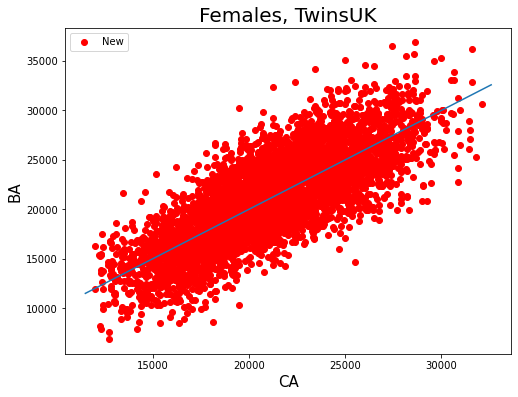

In [89]:
# newer
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(preds_F_compare.date_column, preds_F_compare.new_pred, c='r', label='New')
ax.plot([preds_F_compare.date_column.min()-500,preds_F_compare.date_column.max()+500],[preds_F_compare.date_column.min()-500,preds_F_compare.date_column.max()+500])

plt.ylabel("BA")
plt.xlabel("CA")
ax.legend()
plt.title('Females, TwinsUK',fontsize = BIGGER_SIZE)

plt.show()

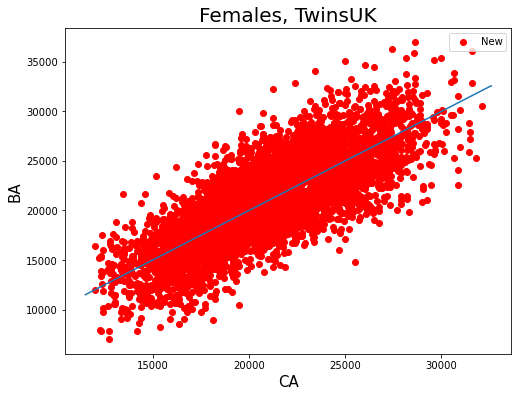

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(preds_F_compare.date_column, preds_F_compare.new_pred, c='r', label='New')
ax.plot([preds_F_compare.date_column.min()-500,preds_F_compare.date_column.max()+500],[preds_F_compare.date_column.min()-500,preds_F_compare.date_column.max()+500])

plt.ylabel("BA")
plt.xlabel("CA")
ax.legend()
plt.title('Females, TwinsUK',fontsize = BIGGER_SIZE)

plt.show()

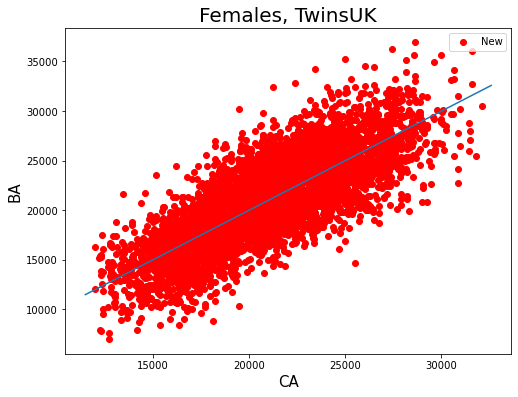

In [74]:
# old






fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(preds_F_compare.date_column, preds_F_compare.new_pred, c='r', label='New')
ax.plot([preds_F_compare.date_column.min()-500,preds_F_compare.date_column.max()+500],[preds_F_compare.date_column.min()-500,preds_F_compare.date_column.max()+500])

plt.ylabel("BA")
plt.xlabel("CA")
ax.legend()
plt.title('Females, TwinsUK',fontsize = BIGGER_SIZE)

plt.show()

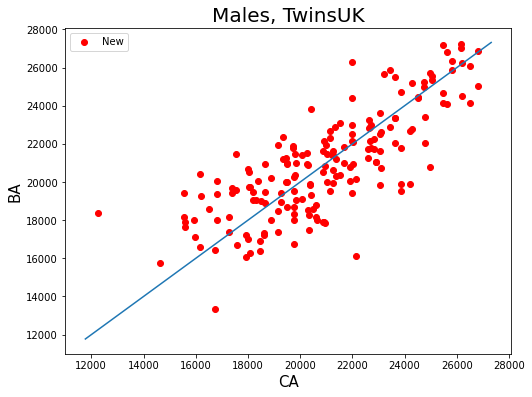

In [90]:
# newer
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(preds_M_compare.date_column, preds_M_compare.new_pred, c='r', label='New')
ax.plot([preds_M_compare.date_column.min()-500,preds_M_compare.date_column.max()+500],[preds_M_compare.date_column.min()-500,preds_M_compare.date_column.max()+500])

plt.ylabel("BA")
plt.xlabel("CA")
ax.legend()
plt.title('Males, TwinsUK',fontsize = BIGGER_SIZE)

plt.show()

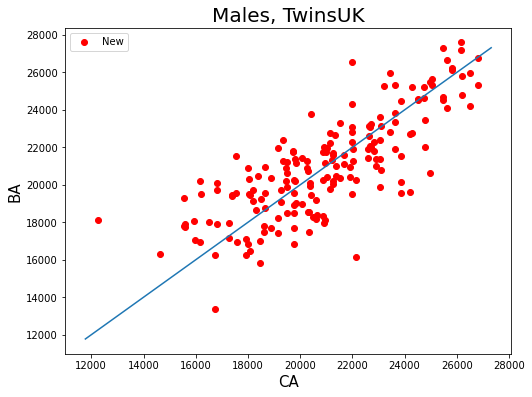

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(preds_M_compare.date_column, preds_M_compare.new_pred, c='r', label='New')
ax.plot([preds_M_compare.date_column.min()-500,preds_M_compare.date_column.max()+500],[preds_M_compare.date_column.min()-500,preds_M_compare.date_column.max()+500])

plt.ylabel("BA")
plt.xlabel("CA")
ax.legend()
plt.title('Males, TwinsUK',fontsize = BIGGER_SIZE)

plt.show()

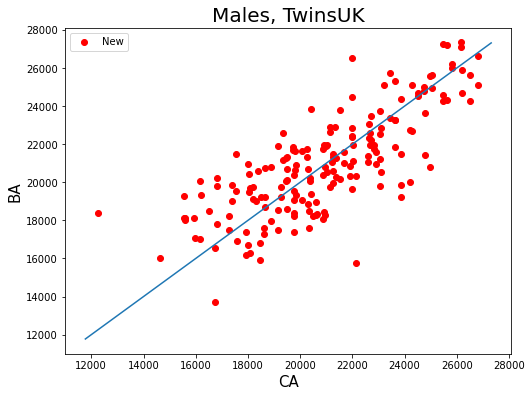

In [72]:
# old





fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(preds_M_compare.date_column, preds_M_compare.new_pred, c='r', label='New')
ax.plot([preds_M_compare.date_column.min()-500,preds_M_compare.date_column.max()+500],[preds_M_compare.date_column.min()-500,preds_M_compare.date_column.max()+500])

plt.ylabel("BA")
plt.xlabel("CA")
ax.legend()
plt.title('Males, TwinsUK',fontsize = BIGGER_SIZE)

plt.show()

In [91]:
preds_F_last = preds_F_compare.rename(columns={"public_client_id": "KeyIndex"})
preds_M_last = preds_M_compare.rename(columns={"public_client_id": "KeyIndex"})

In [92]:
preds_F_last = preds_F_last.rename(columns={"new_pred": "metab_BA"})
preds_M_last = preds_M_last.rename(columns={"new_pred": "metab_BA"})

In [93]:
preds_M_last['metab_deltaAge'] = preds_M_last['metab_BA'] - preds_M_last['date_column']
preds_F_last['metab_deltaAge'] = preds_F_last['metab_BA'] - preds_F_last['date_column']

In [94]:
preds_F_last = preds_F_last.drop(columns=['date_column'])
preds_M_last = preds_M_last.drop(columns=['date_column'])

In [95]:
preds_M_last['Model_Health'] = 'Not filled yet'
preds_F_last['Model_Health'] = 'Not filled yet'

In [97]:
for i in preds_F_last.index:
    if preds_F_last['metab_deltaAge'][i] > 7.5*365.25:
        preds_F_last['Model_Health'][i] = 'Bio_Old'
    elif preds_F_last['metab_deltaAge'][i] < -7.5*365.25:
        preds_F_last['Model_Health'][i] = 'Bio_Young'
    else:
        preds_F_last['Model_Health'][i] = 'BA_equals_CA'

/tmp/ipykernel_2656618/3571573311.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds_F_last['Model_Health'][i] = 'BA_equals_CA'
/tmp/ipykernel_2656618/3571573311.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds_F_last['Model_Health'][i] = 'Bio_Old'
/tmp/ipykernel_2656618/3571573311.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds_F_last['Model_Health'][i] = 'Bio_Young'


In [98]:
for i in preds_M_last.index:
    if preds_M_last['metab_deltaAge'][i] > 5.0*365.25:
        preds_M_last['Model_Health'][i] = 'Bio_Old'
    elif preds_M_last['metab_deltaAge'][i] < -5.0*365.25:
        preds_M_last['Model_Health'][i] = 'Bio_Young'
    else:
        preds_M_last['Model_Health'][i] = 'BA_equals_CA'

/tmp/ipykernel_2656618/1246890552.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds_M_last['Model_Health'][i] = 'BA_equals_CA'
/tmp/ipykernel_2656618/1246890552.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds_M_last['Model_Health'][i] = 'Bio_Young'
/tmp/ipykernel_2656618/1246890552.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds_M_last['Model_Health'][i] = 'Bio_Old'


In [178]:
preds_M_last.Model_Health.value_counts()

BA_equals_CA    128
Bio_Old          30
Bio_Young        24
Name: Model_Health, dtype: int64

In [99]:
preds_M_last.Model_Health.value_counts()

BA_equals_CA    127
Bio_Old          29
Bio_Young        26
Name: Model_Health, dtype: int64

In [100]:
ba_last = pd.concat([preds_F_last,preds_M_last],axis=0)

In [186]:
# ba_last.to_csv('230401_BA_for_Twins_UK_option_2.csv')